In [1]:
import pandas as pd
import matplotlib
import numpy
from matplotlib import interactive

In [2]:
interactive(True)

In [3]:
df = pd.read_csv("C:/Users/Jigarkumar Patel/Downloads/Data Science Project/Predict Hourly Wages/income_training.csv") 
dft = pd.read_csv("C:/Users/Jigarkumar Patel/Downloads/Data Science Project/Predict Hourly Wages/income_testing.csv") 

In [4]:
df.describe()

,compositeHourlyWages,age,yearsEducation,sex1M0F
count,3197.000000,3197.000000,3197.000000,3197.000000
mean,15.495127,36.884579,13.180794,0.491711
std,7.754763,11.996980,3.042127,0.500009
min,2.300000,16.000000,0.000000,0.000000
25%,9.250000,28.000000,12.000000,0.000000
50%,14.210000,36.000000,13.000000,0.000000
75%,19.650000,46.000000,15.000000,1.000000
max,49.920000,65.000000,20.000000,1.000000


In [5]:
df.head(10)

,compositeHourlyWages,age,yearsEducation,sex1M0F
0,21.38,58,10,1
1,25.15,42,16,1
2,8.57,31,12,0
3,12.07,43,13,0
4,10.97,46,12,0
5,22.07,31,19,0
6,23.91,26,12,1
7,5.50,19,13,0
8,7.20,18,11,1
9,14.83,51,10,1


In [6]:
df['age'].value_counts()

32    122
31    113
34    106
36     95
37     95
42     95
35     94
30     93
39     90
25     87
33     84
40     83
38     83
20     83
28     80
29     76
18     76
24     75
48     75
27     73
41     72
45     72
44     71
46     71
26     67
23     66
47     65
19     64
43     64
21     63
53     62
51     60
22     57
54     54
17     51
57     50
49     49
50     45
52     44
55     36
58     35
56     34
16     31
60     28
62     24
59     24
64     20
61     20
63     12
65      8
Name: age, dtype: int64

In [7]:
df['yearsEducation'].value_counts()

12    716
13    412
14    327
15    267
10    258
11    246
17    222
16    212
9     119
18    104
20     96
8      87
19     70
6      15
7      14
4       9
0       8
1       5
5       5
3       3
2       2
Name: yearsEducation, dtype: int64

In [8]:
df['sex1M0F'].value_counts()

0    1625
1    1572
Name: sex1M0F, dtype: int64

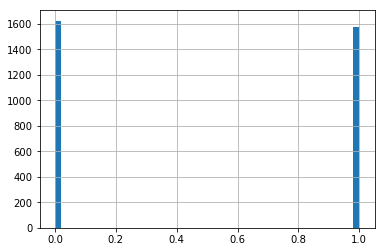

In [13]:
df['sex1M0F'].hist(bins=50)

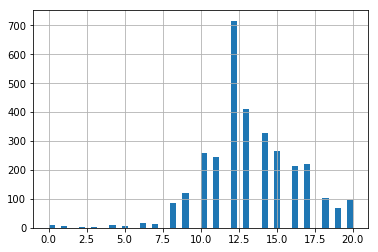

In [11]:
df['yearsEducation'].hist(bins=50)

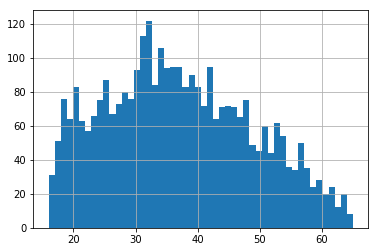

In [12]:
df['age'].hist(bins=50)

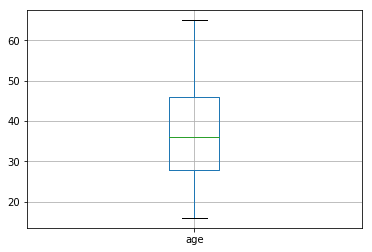

In [14]:
df.boxplot(column='age')

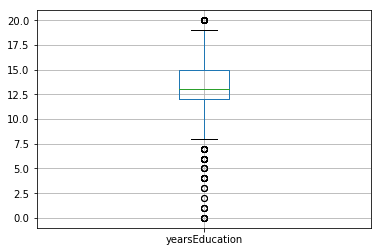

In [15]:
df.boxplot(column='yearsEducation')

#exreme values

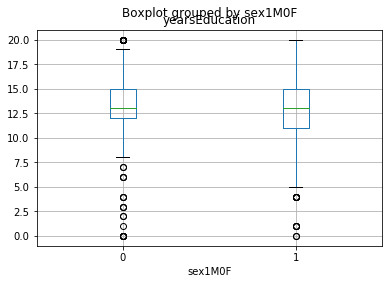

In [18]:
df.boxplot(column='yearsEducation', by = 'sex1M0F')
#extreme values

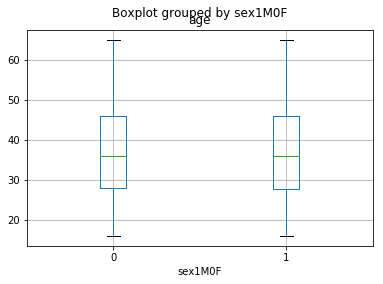

In [19]:
df.boxplot(column='age', by = 'sex1M0F')


In [23]:
df.apply(lambda x: sum(x.isnull()),axis=0)

compositeHourlyWages    0
age                     0
yearsEducation          0
sex1M0F                 0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['age','sex1M0F','yearsEducation','compositeHourlyWages']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

compositeHourlyWages    int64
age                     int64
yearsEducation          int64
sex1M0F                 int64
dtype: object

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(numpy.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [29]:
#Model1

outcome_var = 'compositeHourlyWages'
model = LogisticRegression()
predictor_var = ['yearsEducation']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 2.377%
Cross-Validation Score : 2.096%


In [30]:
#model 2

model = DecisionTreeClassifier()
predictor_var = ['yearsEducation']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 3.441%
Cross-Validation Score : 2.127%


In [31]:
#model 3
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['yearsEducation']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 3.441%
Cross-Validation Score : 2.252%


In [32]:
df

,compositeHourlyWages,age,yearsEducation,sex1M0F
0,956,42,10,1
1,1097,26,16,1
2,221,15,12,0
3,432,27,13,0
4,375,30,12,0
5,986,15,19,0
6,1059,10,12,1
7,41,3,13,0
8,134,2,11,1
9,607,35,10,1


In [34]:
df['compositeHourlyWages'].value_counts()

118     73
315     65
91      62
430     52
619     43
189     39
863     34
247     33
560     29
1022    29
681     28
377     26
1064    25
636     24
153     24
217     19
96      19
899     18
809     18
738     18
497     18
76      17
967     17
584     17
797     17
850     16
1188    16
105     14
725     13
845     12
        ..
133      1
135      1
249      1
245      1
239      1
237      1
235      1
233      1
231      1
229      1
225      1
219      1
215      1
205      1
201      1
199      1
197      1
195      1
191      1
187      1
185      1
177      1
175      1
157      1
151      1
149      1
147      1
145      1
141      1
0        1
Name: compositeHourlyWages, Length: 1323, dtype: int64

In [49]:
df['wageCat'] = df['compositeHourlyWages']
count = 0
for i in df['compositeHourlyWages']:
    if(i>1000):
        df['wageCat'][count] = 1
    if(i<1001 and i>900):
        df['wageCat'][count] = 2 
    if(i<901 and i>800):
        df['wageCat'][count] = 3
    if(i<801 and i>700):
        df['wageCat'][count] = 4
    if(i<701 and i>600):
        df['wageCat'][count] = 5
    if(i<601 and i>500):
        df['wageCat'][count] = 6
    if(i<501 and i>400):
        df['wageCat'][count] = 7
    if(i<401 and i>300):
        df['wageCat'][count] = 8
    if(i<301 and i>200):
        df['wageCat'][count] = 9
    if(i<201 and i>100):
        df['wageCat'][count] = 10
    if(i<101):
        df['wageCat'][count] = 11
    count+=1
    
print(count)


3197


In [50]:
df.head(10)

,compositeHourlyWages,age,yearsEducation,sex1M0F,wageCat
0,956,42,10,1,2
1,1097,26,16,1,1
2,221,15,12,0,9
3,432,27,13,0,7
4,375,30,12,0,8
5,986,15,19,0,2
6,1059,10,12,1,1
7,41,3,13,0,11
8,134,2,11,1,10
9,607,35,10,1,5


In [51]:
df['wageCat'].value_counts()

1     568
10    346
8     285
11    282
5     279
7     267
3     252
6     247
9     245
4     244
2     182
Name: wageCat, dtype: int64

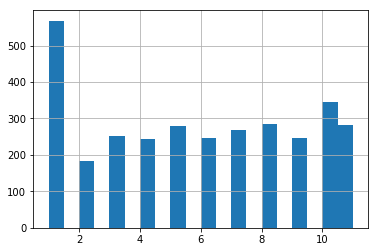

In [53]:
df['wageCat'].hist(bins=20) 

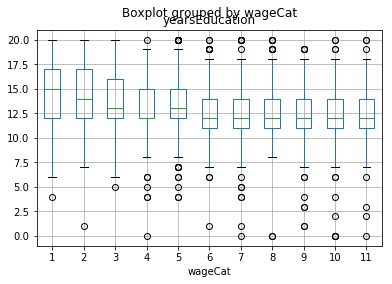

In [62]:
df.boxplot('yearsEducation','wageCat')

In [68]:
#Model1

outcome_var = 'wageCat'
model = LogisticRegression()
predictor_var = ['sex1M0F','age','yearsEducation']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 25.712%
Cross-Validation Score : 25.087%


In [67]:
#model 2

model = DecisionTreeClassifier()
predictor_var = ['sex1M0F','age','yearsEducation']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 48.483%
Cross-Validation Score : 17.548%


In [66]:
#model 3
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['sex1M0F','age','yearsEducation']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 48.483%
Cross-Validation Score : 17.330%


In [71]:
from sklearn import svm
model = svm.SVC()
predictor_var = ['sex1M0F','age','yearsEducation']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 35.565%
Cross-Validation Score : 23.836%


In [72]:
from sklearn import svm
model = svm.LinearSVC()
predictor_var = ['sex1M0F','age','yearsEducation']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 17.172%
Cross-Validation Score : 12.979%
